# Trabajo práctico integrador

**Nombre**:

## Primera Parte (Clase 1 y 2)

In [4]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

### Primer ejercicio

Dada una matriz en formato *numpy array*, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas $l_0$, $l_1$, $l_2$, $l_{\infty}$, según la siguientes definiciones:

\begin{equation}
    ||\mathbf{x}||^{p} = \bigg(\sum_{j=1}^{n}{|x_i|^p}\bigg)^{\frac{1}{p}}
\end{equation}

con los casos especiales para $p=0$ y $p=\infty$ siendo:

\begin{equation}
    \begin{array}{rcl}
        ||\mathbf{x}||_0 & = & \bigg(\sum_{j=1 \wedge x_j != 0}{|x_i|}\bigg)\\
        ||\mathbf{x}||_{\infty} & = & \max_{i}{|x_i|}\\
    \end{array}
\end{equation}

In [5]:
vector = np.random.randint(-10,10,100000)
vector

array([-1,  6, -6, ..., -4,  4,  6])

In [6]:
def norma(vector, l):
    if l == 0:
        return np.sum(vector != 0)
    if l == np.inf:
        return np.max(np.abs(vector))
    if l > 0:
        return np.power(np.sum(np.power(np.abs(vector),l)),1/l)

l = 2
print(norma(vector, l))
print(np.linalg.norm(vector, ord=l))

1824.9994520547123
1824.9994520547123


In [7]:
# Medir el tiempo de ejecución de la función norma()
t1 = timeit.timeit(lambda: norma(vector, 0), number=1000)

# Medir el tiempo de ejecución de la función np.linalg.norm()
t2 = timeit.timeit(lambda: np.linalg.norm(vector, ord=0), number=1000)

print("Tiempo de ejecución de norma():", t1)
print("Tiempo de ejecución de np.linalg.norm():", t2)

Tiempo de ejecución de norma(): 0.11968400000023394
Tiempo de ejecución de np.linalg.norm(): 0.17553119999956834


### Segundo Ejercicio

En clasificación contamos con dos arreglos, la “verdad” y la “predicción”. Cada elemento de los arreglos pueden tomar dos valores, “True” (representado por 1) y “False” (representado por 0). Entonces podemos definir 4 variables:

* True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
* True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
* False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
* False Negative (FN): El valor verdadero es 1 y el valor predicho es 0

A partir de esto definimos:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)
 
Calcular las 3 métricas con Numpy y operaciones vectorizadas.

In [8]:
truth =      np.array([1,1,0,1,1,1,0,0,1,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

In [9]:
TP = np.sum(truth & prediction)
TN = np.sum((truth | prediction) == 0)
FP = np.sum(~truth & prediction)
FN = np.sum(truth & ~prediction)

print(TP,TN,FP,FN)
print("Precision = ", TP / (TP + FP))
print("Recall = ", TP / (TP + FN))
print("Accuracy = ", (TP + TN) / (TP + TN + FP + FN))

3 0 3 4
Precision =  0.5
Recall =  0.42857142857142855
Accuracy =  0.3


### Tercer y Cuarto Ejercicio

Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

## Segunda Parte (Clase 3 y 4)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn import metrics
from sklearn.metrics import mean_squared_error


# Crear datasets
from sklearn.datasets import make_regression

Vamos a crear un dataset sintetico utilizando las librerias de [Sklearn Datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html), en particular nos interesa crear un problema de regresion
lineal al que podemos variarle sus parametros

In [38]:
# Creamos un dataset de prueba
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)
new_data.shape

(1000, 2)

In [42]:
df = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df.columns = new_col

df.head()

,feature_1,target
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314


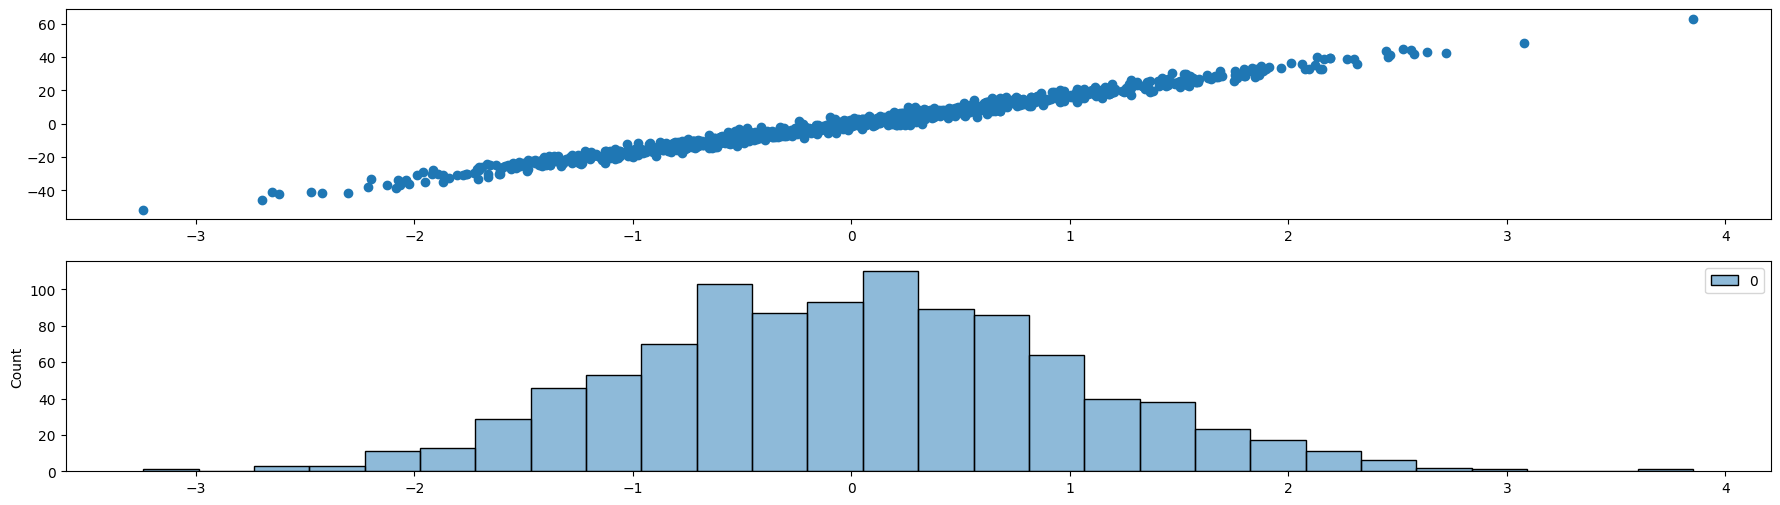

In [43]:
fig,axes = plt.subplots(2,figsize=(22,6))
axes[0].scatter(X,y)
sns.histplot(X, ax=axes[1]);

### Funciones auxiliares para generar datos anómalos

In [2]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [30]:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = True, two_tailed= True)

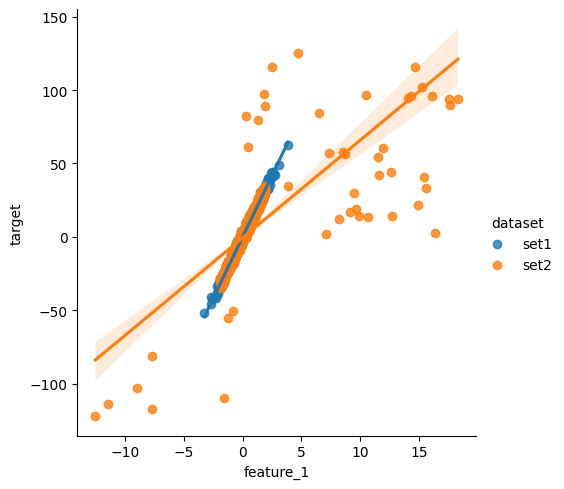

In [50]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

### Quinto ejercicio

Crear una función que separe los datos en train-validation-test 70-20-10


Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

In [32]:
def split_data(dataset, porcentaje_train=0.7, porcentaje_val=0.2, porcentaje_test=0.1):

    # Verificamos que los porcentajes sumen el 100%
    if not np.isclose(porcentaje_train + porcentaje_val + porcentaje_test, 1.0):
        raise ValueError("Los porcentajes deben sumar 1.0.")
    
    # Obtenemos el tamaño del conjunto de datos
    Tamaño_dataset = len(dataset)
    
    # Calculamos los indices de division de cada conjunto
    train_end = int(porcentaje_train * Tamaño_dataset)
    val_end = train_end + int(porcentaje_val * Tamaño_dataset)
    
    # Permutamos aleatoriamente los indices para obtener una muestra aleatoria (Ej: [6 5 3 9 1 7 4 8 0 2])
    indices = np.random.permutation(Tamaño_dataset)
    print(indices)
    
    # Obtenemos los conjuntos de datos de entrenamiento, validacion y prueba
    train_data = dataset[indices[:train_end]] # En este caso: [6 5 3 9 1 7 4], indices desde el 0 al 6
    val_data = dataset[indices[train_end:val_end]] # En este caso: [8 0], indices desde el 7 al 8
    test_data = dataset[indices[val_end:]] # En este caso: [2], indice 9
    
    return train_data[:,0], val_data[:,0], test_data[:,0],train_data[:,1], val_data[:,1], test_data[:,1]

In [33]:
# Creamos un dataset de prueba
X1, y1 = make_regression(n_samples = 10,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data1 = np.append(X1,y1.reshape(-1,1),axis=1)
new_data1.shape

df = pd.DataFrame(new_data1, columns=['X(Feature)', 'Y(Respuesta)'])

print(df.head(10))

   X(Feature)  Y(Respuesta)
0   -0.138264     -4.362156
1   -0.469474     -9.942904
2    0.767435     12.469066
3   -0.234137     -7.304946
4   -0.234153     -2.624603
5    0.542560      5.585855
6    0.496714      7.888743
7    1.523030     29.593225
8    1.579213     27.857940
9    0.647689      6.551497


In [34]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = split_data(new_data1, porcentaje_train=0.7, porcentaje_val=0.2, porcentaje_test=0.1)

print(X_train, "\n", X_val, "\n", X_test, "\n", Y_train, "\n", Y_val, "\n", Y_test)

[6 2 0 1 5 3 9 4 8 7]
[ 0.49671415  0.76743473 -0.1382643  -0.46947439  0.54256004 -0.23413696
  0.64768854] 
 [-0.23415337  1.57921282] 
 [1.52302986] 
 [ 7.88874313 12.46906577 -4.36215588 -9.94290409  5.5858549  -7.30494645
  6.55149669] 
 [-2.62460281 27.85793971] 
 [29.59322473]


### Sexto ejercicio

Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generar datasets:
    - Uno normal con poco `noise` y pocos outliers
    - Uno con mucho `noise` y pocos outliers
    - Uno con poco `noise` y muchos outliers
    - Uno con mucho `noise` y muchos outliers
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Comparar y analizar resultados.

In [3]:
# Creamos un dataset de prueba
## Utilicen mas `n_features` > 1 y n_informative mas o menos la mitad de n_features
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 1,
                       n_informative = 1,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)

df = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df.columns = new_col

df.head()

,feature_1,target
0,-1.758739,-29.787279
1,1.031845,15.903898
2,-0.487606,-9.142930
3,0.186454,2.411486
4,0.725767,12.250321


In [4]:
#df_outlier = generate_outliers(df,['feature_1'], percentage = 0.02, extreme_outlier = False, two_tailed= True)

In [5]:
# # Graficar el DataFrame

# plt.figure(figsize=(20, 20))
# sns.pairplot(df_outlier, x_vars=df.columns[:-1], y_vars='target', kind='scatter')
# plt.title('Noise = 1, Out% = 0.02, two_tailed= True', fontsize=12)

# # Mostrar el gráfico
# plt.show()

In [6]:
df_outlier1 = generate_outliers(df,['feature_1'], percentage = 0.001, extreme_outlier = False, two_tailed= True)
df_outlier2 = generate_outliers(df,['feature_1'], percentage = 0.01, extreme_outlier = False, two_tailed= True)
df_outlier3 = generate_outliers(df,['feature_1'], percentage = 0.02, extreme_outlier = False, two_tailed= True)
df_outlier4 = generate_outliers(df,['feature_1'], percentage = 0.1, extreme_outlier = False, two_tailed= True)

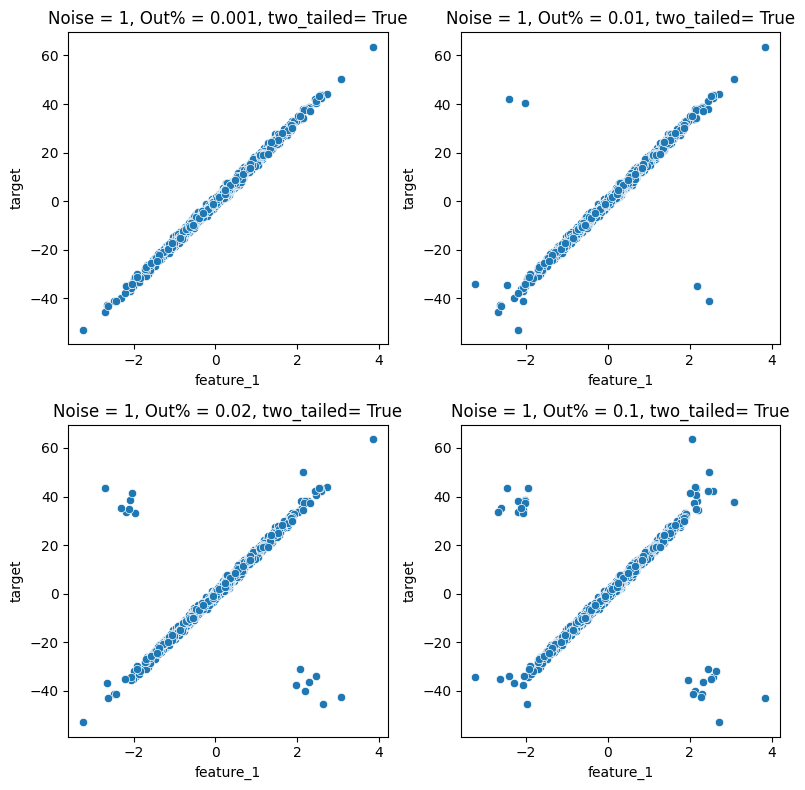

In [7]:
# Crear una figura y una cuadrícula de subtramas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Lista de DataFrames
dataframes = [df_outlier1, df_outlier2, df_outlier3, df_outlier4]

# Iterar sobre los DataFrames y asignar cada uno a una subtrama
for i, lista in enumerate(dataframes):
    row = i // 2  # Fila de la subtrama
    col = i % 2   # Columna de la subtrama
    
    # Graficar el DataFrame en la subtrama correspondiente
    for column in lista.columns[:-1]:
        sns.scatterplot(data=lista, x=column, y='target', ax=axes[row, col])

axes[0, 0].set_title('Noise = 1, Out% = 0.001, two_tailed= True', fontsize=12)
axes[0, 1].set_title('Noise = 1, Out% = 0.01, two_tailed= True', fontsize=12)
axes[1, 0].set_title('Noise = 1, Out% = 0.02, two_tailed= True', fontsize=12)
axes[1, 1].set_title('Noise = 1, Out% = 0.1, two_tailed= True', fontsize=12)

# Ajustar el espaciado entre subtramas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression, HuberRegressor, ElasticNetCV
from sklearn.model_selection import train_test_split

In [9]:
X1 = df_outlier1.drop('target', axis=1)  # DataFrame con las características
y1 = df_outlier1['target']  # Serie con la variable objetivo

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [11]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = regression_model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
print(f"El error (mse) de test es: {mse}")

rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = y_pred,
            squared = False
           )

print(f"El error (rmse) de test es: {rmse_ols}")

R2 = metrics.r2_score(y_test, y_pred)
print(f"El valor (R2) de test es: {R2}")

El error (mse) de test es: 1.043825519559741
El error (rmse) de test es: 1.0216777963525199
El valor (R2) de test es: 0.9960099726551309


In [14]:
valor_minimo = y1.min()
valor_maximo = y1.max()

print("Valor mínimo:", valor_minimo)
print("Valor máximo:", valor_maximo)

Valor mínimo: -52.971572916031576
Valor máximo: 63.69834789930302


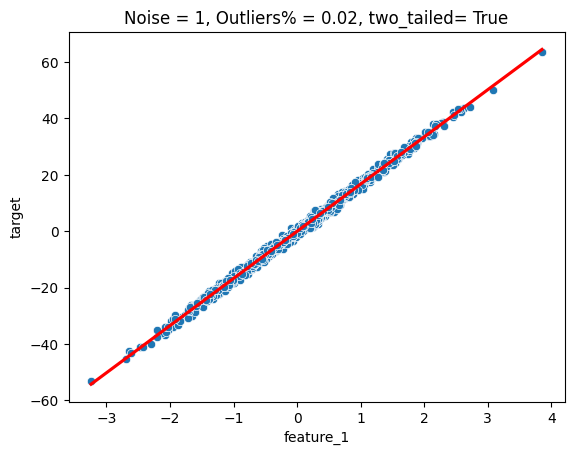

In [15]:
# Concatenar la característica y la variable objetivo en un solo DataFrame
df_plot = pd.concat([X1['feature_1'], y1], axis=1)

# Crear un subplot con una sola gráfica
fig, ax = plt.subplots()

# Graficar scatterplot con línea de regresión
sns.scatterplot(data=df_plot, x='feature_1', y='target', ax=ax)
sns.regplot(data=df_plot, x='feature_1', y='target', scatter=False, color='red', ax=ax)
plt.title('Noise = 1, Outliers% = 0.02, two_tailed= True', fontsize=12)

plt.show()

## Tercera Parte (Clase 5, 6 y 7)

La ultima parte la van a poder encontrar en el archivo `template_tp_integrador_tercera_parte.ipynb`